In [93]:
from non_markovian import get_spectral_density, compute_correlation_function
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [94]:
eta = 1.0
omega_c = 10.0
omegas = jnp.linspace(0, 30, 5000)

# 1. Ohmic (s=1)
def ohmic_spectral_density(omega):
    return get_spectral_density(omega, eta, omega_c, s=1.0)

# 2. Sub-Ohmic (s=0.5)
def sub_ohmic_spectral_density(omega):
    return get_spectral_density(omega, eta, omega_c, s=0.5)

# 3. Super-Ohmic (s=3.0) 
def super_ohmic_spectral_density(omega):
    return get_spectral_density(omega, eta, omega_c, s=3.0)

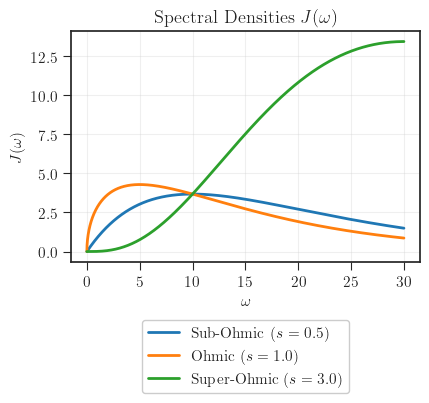

In [95]:
plt.style.use(['seaborn-v0_8-white', './style.mplstyle'])

fig, ax = plt.subplots(figsize=(4.5, 3))

plt.plot(omegas, ohmic_spectral_density(omegas), label=r'Sub-Ohmic ($s=0.5$)', linewidth=2)
plt.plot(omegas, sub_ohmic_spectral_density(omegas), label=r'Ohmic ($s=1.0$)', linewidth=2)
plt.plot(omegas, super_ohmic_spectral_density(omegas), label=r'Super-Ohmic ($s=3.0$)', linewidth=2)

plt.title(r"Spectral Densities $J(\omega)$")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$J(\omega)$')
plt.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.6))
plt.grid(True, alpha=0.3)
plt.show()

In [96]:
times = jnp.linspace(-0.3, 0.3, 5000)
beta = 1.0
w_max = 1_000   # Integration limit (should be >> OMEGA_C)
n_steps = 5000  # Precision of integration

# 1. Ohmic (s=1)
C_t_ohmic = compute_correlation_function(times, ohmic_spectral_density, beta, w_max, n_steps)

# 2. Sub-Ohmic (s=0.5)
C_t_sub_ohmic = compute_correlation_function(times, sub_ohmic_spectral_density, beta, w_max, n_steps)

# 3. Super-Ohmic (s=3.0)
C_t_super_ohmic = compute_correlation_function(times, super_ohmic_spectral_density, beta, w_max, n_steps)

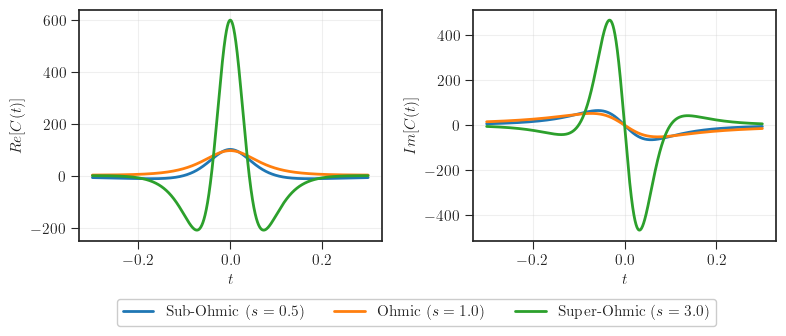

In [97]:
fig, ax = plt.subplots(1,2, figsize=(9, 3))

plt.subplots_adjust(
    wspace=0.3 
)

ax[0].plot(times, jnp.real(C_t_ohmic), label=r'Sub-Ohmic ($s=0.5$)', linewidth = 2)
ax[0].plot(times, jnp.real(C_t_sub_ohmic), label=r'Ohmic ($s=1.0$)', linewidth = 2)
ax[0].plot(times, jnp.real(C_t_super_ohmic), label=r'Super-Ohmic ($s=3.0$)', linewidth = 2)

ax[1].plot(times, jnp.imag(C_t_ohmic), label=r'Sub-Ohmic ($s=0.5$)', linewidth = 2)
ax[1].plot(times, jnp.imag(C_t_sub_ohmic), label=r'Ohmic ($s=1.0$)', linewidth = 2)
ax[1].plot(times, jnp.imag(C_t_super_ohmic), label=r'Super-Ohmic ($s=3.0$)', linewidth = 2)

ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$Re[C(t)]$')
ax[0].grid(True, alpha=0.3)

ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$Im[C(t)]$')
ax[1].grid(True, alpha=0.3)

lines, labels = ax[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.2))

plt.show()